In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

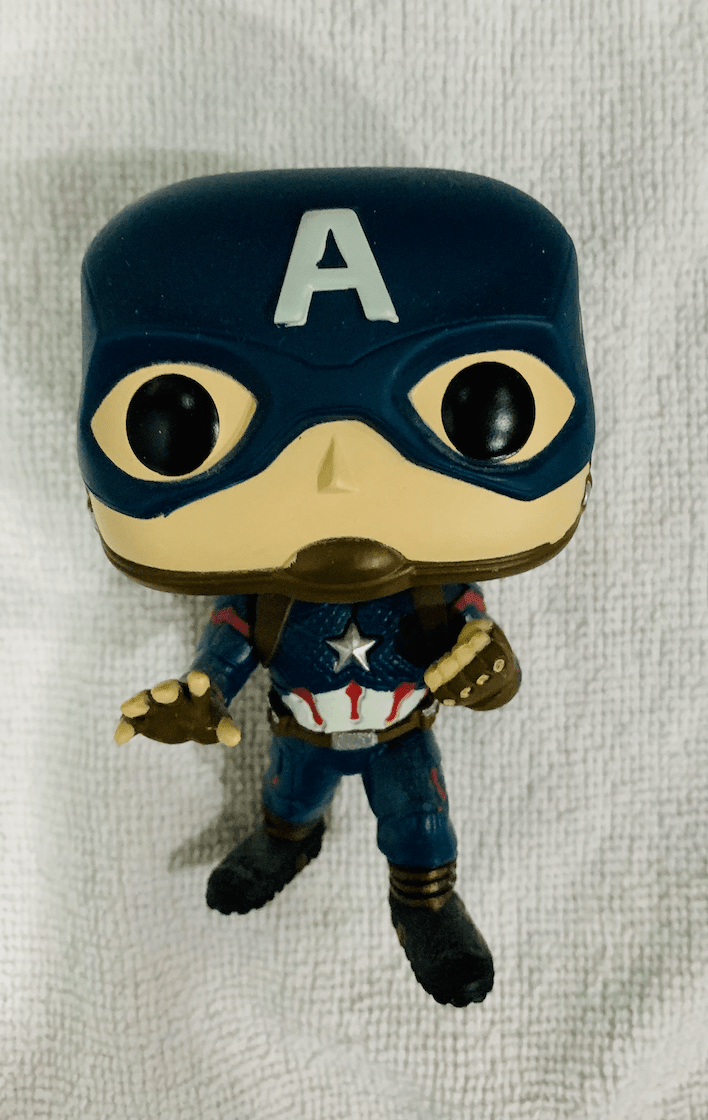

In [2]:
image1 = cv.imread('/content/drive/My Drive/Dataset/Images/4-min.png')

image_orig = image1.copy()

cv2_imshow(image1)

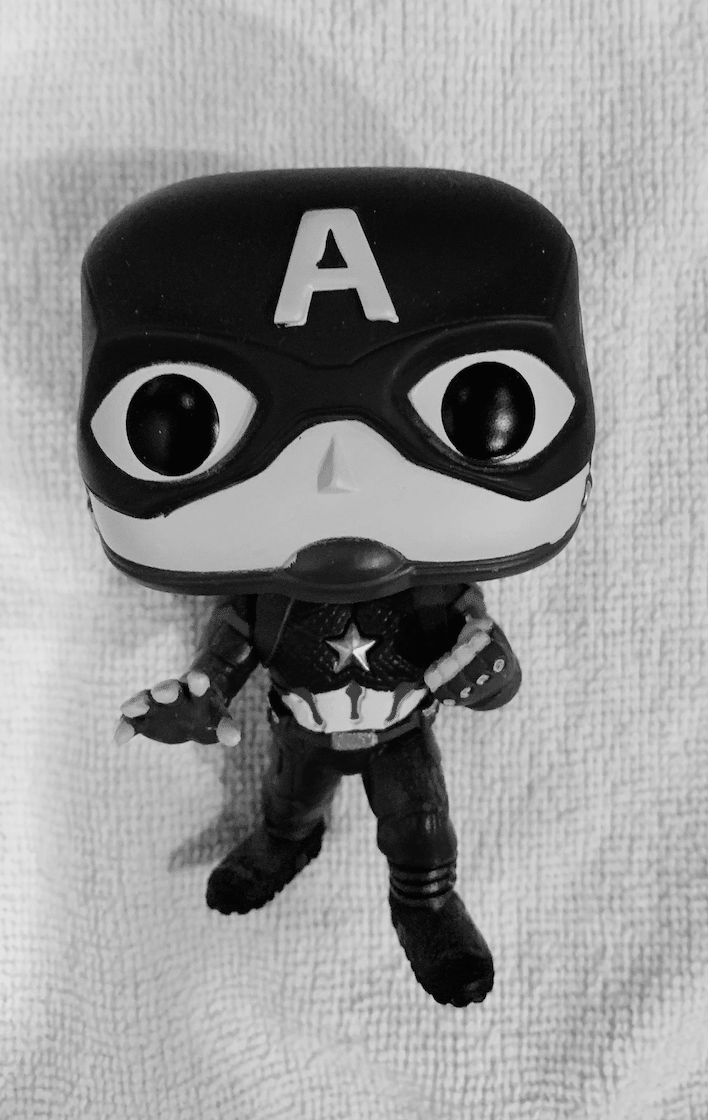

In [3]:
image = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

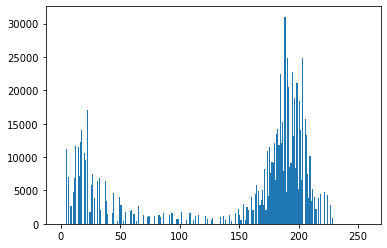

In [4]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

In [ ]:
# image = cv.medianBlur(image, 3)
# cv2_imshow(image)

130.0


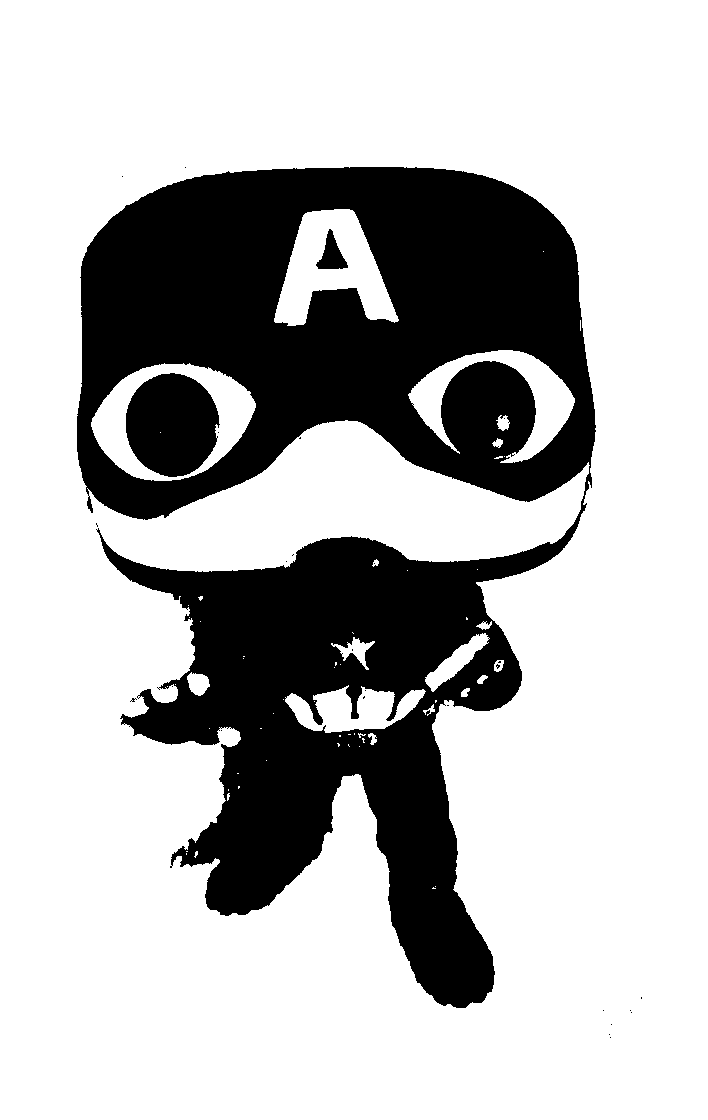

In [5]:
thresholding_value, thresholding_result = cv.threshold(image, 130, 255, cv.THRESH_BINARY)
print(thresholding_value)
cv2_imshow(thresholding_result)

In [6]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[ 610, 1037]]], dtype=int32), array([[[ 609, 1034]]], dtype=int32), array([[[ 611, 1024]]], dtype=int32), array([[[ 631, 1012]]], dtype=int32), array([[[ 630, 1010]]], dtype=int32), array([[[ 603, 1010]]], dtype=int32), array([[[641, 997]],

       [[641, 998]]], dtype=int32), array([[[221, 730]]], dtype=int32), array([[[447, 705]],

       [[448, 705]]], dtype=int32), array([[[132, 698]],

       [[132, 699]],

       [[130, 701]],

       [[131, 700]],

       [[132, 701]],

       [[134, 701]],

       [[133, 700]],

       [[135, 698]],

       [[136, 699]],

       [[135, 698]],

       [[134, 699]],

       [[133, 698]]], dtype=int32), array([[[172, 686]]], dtype=int32), array([[[286, 561]]], dtype=int32), array([[[293, 554]],

       [[292, 555]]], dtype=int32), array([[[ 96, 523]],

       [[ 96, 524]],

       [[ 97, 525]],

       [[ 97, 526]],

       [[ 97, 525]],

       [[ 96, 524]]], dtype=int32), array([[[300, 437]],

       [[299, 438]],

       [[300, 438]]],

In [7]:
len(contours)

18

In [8]:
contours[0]

array([[[ 610, 1037]]], dtype=int32)

In [9]:
#FeatureExtraxtion Contours
area = cv.contourArea(contours[0])

area

0.0

In [10]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

610 1037 1 1


In [11]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Contour #0 610 1037 1 1 0.0
Contour #1 609 1034 1 1 0.0
Contour #2 611 1024 1 1 0.0
Contour #3 631 1012 1 1 0.0
Contour #4 630 1010 1 1 0.0
Contour #5 603 1010 1 1 0.0
Contour #6 641 997 1 2 0.0
Contour #7 221 730 1 1 0.0
Contour #8 447 705 2 1 0.0
Contour #9 130 698 7 4 5.5
Contour #10 172 686 1 1 0.0
Contour #11 286 561 1 1 0.0
Contour #12 292 554 2 2 0.0
Contour #13 96 523 2 4 0.0
Contour #14 299 437 2 2 0.5
Contour #15 122 176 1 1 0.0
Contour #16 77 167 519 841 246156.5
Contour #17 185 167 1 1 0.0


Object


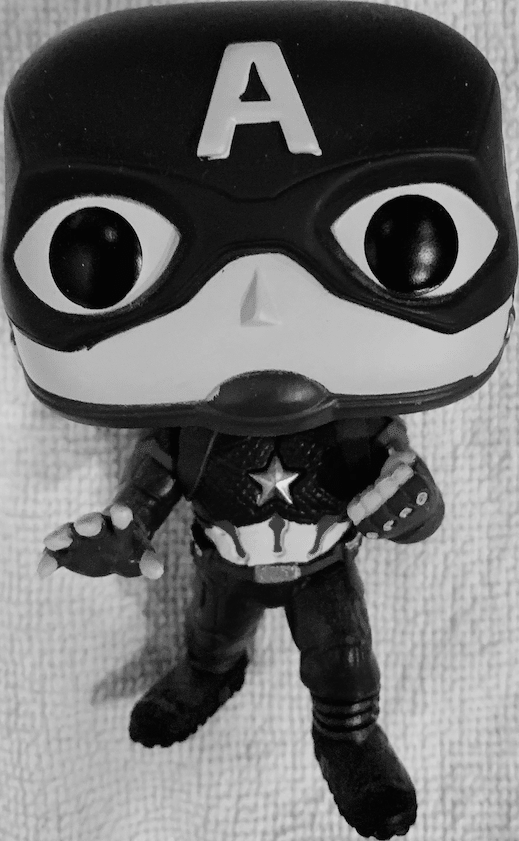

In [12]:
x, y, w, h = cv.boundingRect(contours[16])
capt = image[y:y+h, x:x+w]
print('Object')
cv2_imshow(capt)

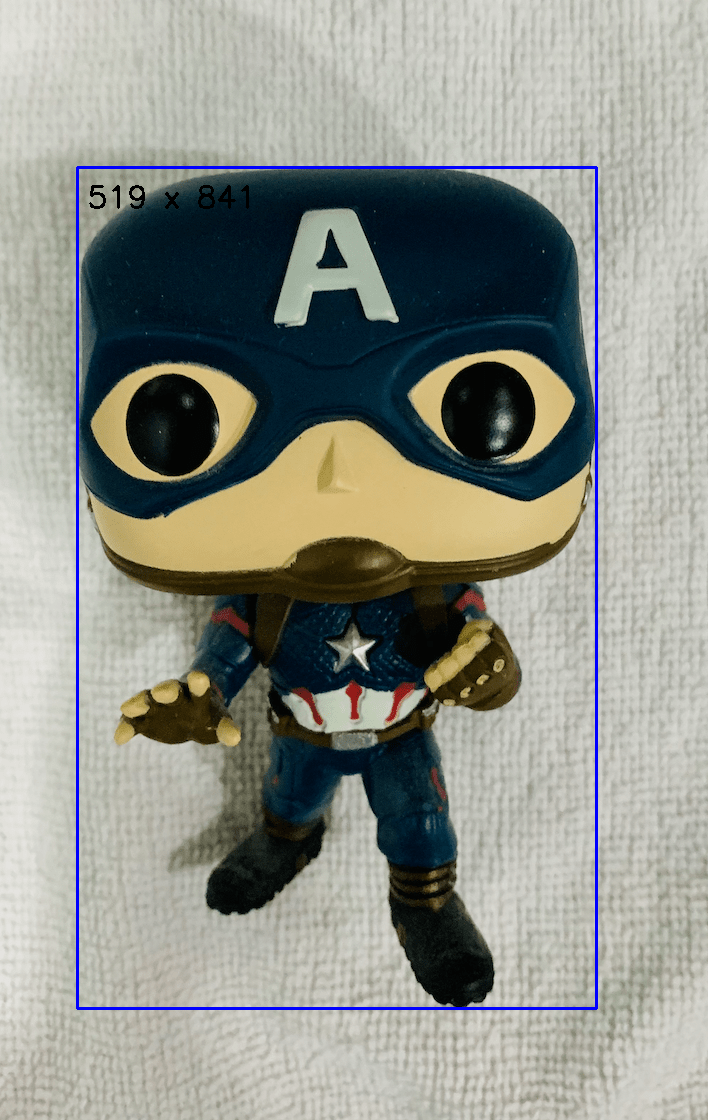

In [16]:
image_orig = image1.copy()
cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX
bottomRightCornerOfText = (x+10,y+40)
fontScale = 1
fontColor = (0,0,0)
lineType = 2
text = str(w) + ' x ' + str(h)
cv.putText(image_orig, text, bottomRightCornerOfText, font, fontScale, fontColor, lineType)
cv2_imshow(image_orig)


Proses preprosesing sebelum ekstraksi contour : Gambar diubah menjadi abu-abu menggunakan grayscale. Agar mempertajam gambar digunakan fungsi equalized. Kemudian dilakukan global thresholding. Dikarenakan background berwarna putih, maka diperlukan fungsi bitwise karena program membaca background hanya berwarna hitam. Dari hasil thresholding didapatkan contournya.

